 # There are two common Techniques to handle missing values

* ## 1 Remove  

* ## 2 Impute

# 1 Remove Technique



* # Complete Case Analysis

## Complete Casa Analysis (CCA) also called 

## `list-wise delection` of cases, consists in discarding observations (ROW) where values in any of the variable (Column) are Missing

* ## Assumption For CCA
    * ## When Missing Data are only random wise
    * ## When Missing Data are in 5%

# Example


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data_science_jobs.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


# Check Percentage of missing data

In [3]:
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
df.shape

(19158, 13)

# Check 5 % Data
## null value shorter than 0.05 and greater than 0

In [5]:
col = [i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean() > 0]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
10597,0.910,no_enrollment,Graduate,20.0,19.0
11945,0.624,no_enrollment,Graduate,9.0,9.0
18615,0.920,Full time course,Graduate,5.0,96.0
13226,0.624,Full time course,Graduate,5.0,9.0
2297,0.939,no_enrollment,Graduate,8.0,81.0


# Check Data length before droping value

In [7]:
len(df[col].dropna()) / len(df)

0.8968577095730244

# Check rows

In [8]:
new_df = df[col].dropna()
df.shape , new_df.shape

((19158, 13), (17182, 5))

# Plot graph

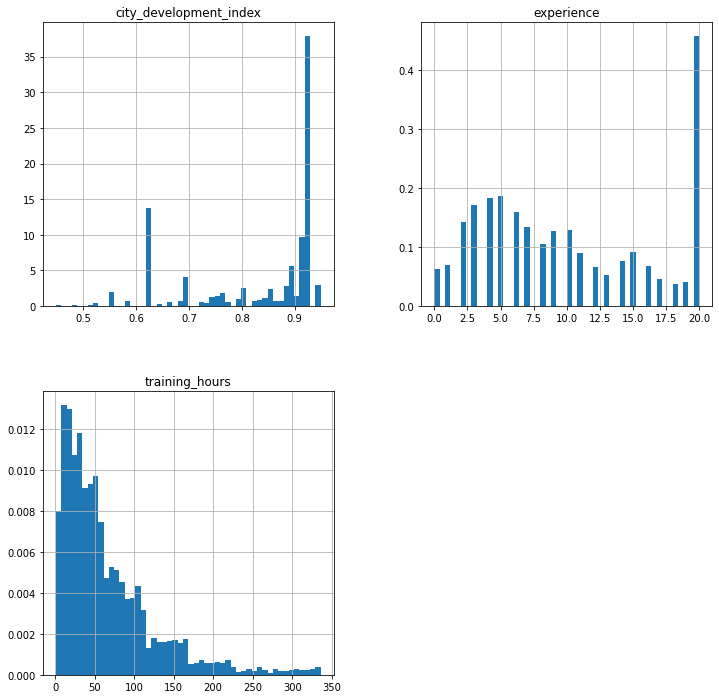

In [9]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()



# Analysis training_hours 

<AxesSubplot:>

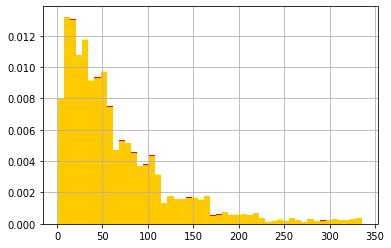

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# after applying CCA
new_df['training_hours'].hist(bins=50, ax=ax, color='yellow', density=True, alpha=0.8)


# plot Density graph

<AxesSubplot:ylabel='Density'>

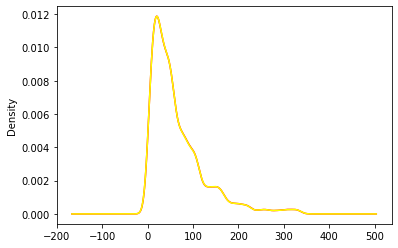

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='yellow')



# Analysis city_development_index

<AxesSubplot:>

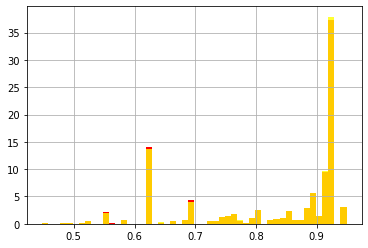

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='yellow', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

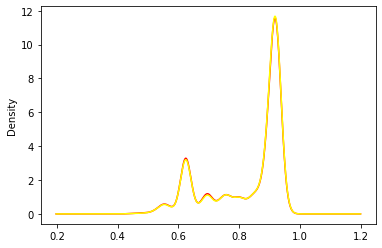

In [13]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='yellow')



# Analysis experience

<AxesSubplot:>

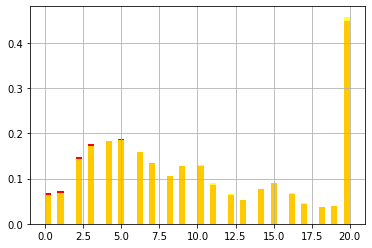

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='yellow', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

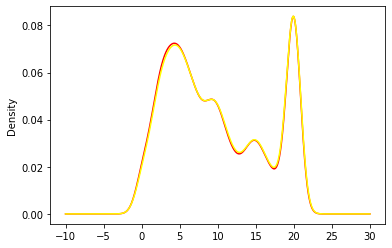

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='yellow')



# Check Categorical enrolled_university Data 

In [16]:
df.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [17]:
temp = pd.concat([
    
    # orignal
    df.enrolled_university.value_counts() / len(df),
    
    # CCA DATA
    new_df.enrolled_university.value_counts() / len(new_df)
],axis=1)


In [18]:
temp.columns = ["Orignal","CCA"]
temp

,Orignal,CCA
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


# Check Categorical education_level Data 

In [19]:
df.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [20]:
temp2 = pd.concat([
    
    # orignal
    df.education_level.value_counts() / len(df),
    
    # CCA DATA
    new_df.education_level.value_counts() / len(new_df)
],axis=1)


In [21]:
temp2.columns = ["Orignal","CCA"]
temp2

,Orignal,CCA
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
